## Importe

### Importieren benötigter Module und Plot-Einstellungen setzen.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')
sns.set()

## Datensatz laden

### Datensatz "Boston house prices" laden und analysieren.

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Datensatz splitten

### Datensatz aufteilen in Trainingsdaten und Testdaten.

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Visualisieren

### Zufällig ausgewählte Features plotten.

In [10]:
def compute_line(data, model):
    x_min = data.min()
    x_max = data.max()
    reg_line = model.intercept_ + (model.coef_ * np.arange(0, x_max+1))
    return reg_line

In [11]:
def plot_reg(X_train, X_test, y_train, y_test, predictions, reg_line):
    x_min = min(X_train.min(), X_test.min())
    x_max = max(X_train.max(), X_test.max())
    y_min = min(y_train.min(), y_test.min())
    y_max = max(y_train.max(), y_test.max())
    plt.xlim(x_min-(0.1*x_max), x_max+(0.1*x_max))
    plt.ylim(y_min-5, y_max+5)
    plt.plot(reg_line, linewidth=5, color='r', zorder=0)
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, predictions, color='k', zorder=10)
    plt.show()

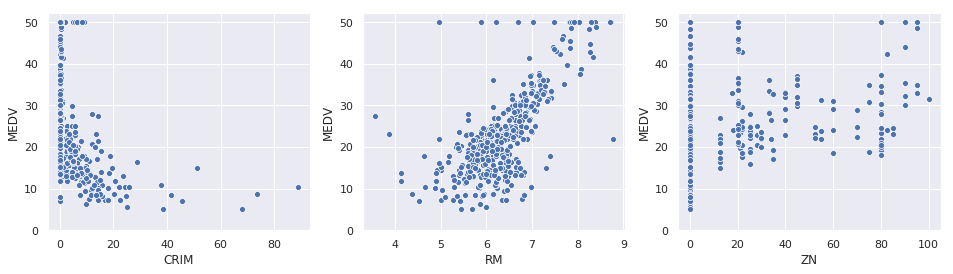

In [12]:
fig, axs = plt.subplots(ncols=3,figsize=(16,4))

for i, var in enumerate(['CRIM', 'RM', 'ZN']):
    lm = sns.scatterplot(X[var], y, ax = axs[i])
#    lm = sns.regplot(X[var], y, ax = axs[i])
    lm.set(ylim=(0, None))

## Lineare Regression mit einem Feature

### Feature setzen

In [13]:
feature = 'ZN'

### Trainings- und Testdaten auf das Feature reduzieren

In [14]:
X_train_one_feature = np.array(X_train[feature].copy()).reshape(-1,1)
X_test_one_feature = np.array(X_test[feature].copy()).reshape(-1,1)

### Model erzeugen

In [15]:
model = LinearRegression()

### Model trainieren

In [16]:
model.fit(X_train_one_feature, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Preise für Testdaten vorhersagen

In [17]:
predictions = model.predict(X_test_one_feature)

In [18]:
predictions[:5]

array([20.72257099, 20.72257099, 20.72257099, 20.72257099, 20.72257099])

In [19]:
reg_line = compute_line(X_train[feature], model)

In [20]:
reg_line

array([20.72257099, 20.88275595, 21.0429409 , 21.20312586, 21.36331082,
       21.52349577, 21.68368073, 21.84386569, 22.00405065, 22.1642356 ,
       22.32442056, 22.48460552, 22.64479047, 22.80497543, 22.96516039,
       23.12534534, 23.2855303 , 23.44571526, 23.60590022, 23.76608517,
       23.92627013, 24.08645509, 24.24664004, 24.406825  , 24.56700996,
       24.72719492, 24.88737987, 25.04756483, 25.20774979, 25.36793474,
       25.5281197 , 25.68830466, 25.84848961, 26.00867457, 26.16885953,
       26.32904449, 26.48922944, 26.6494144 , 26.80959936, 26.96978431,
       27.12996927, 27.29015423, 27.45033919, 27.61052414, 27.7707091 ,
       27.93089406, 28.09107901, 28.25126397, 28.41144893, 28.57163388,
       28.73181884, 28.8920038 , 29.05218876, 29.21237371, 29.37255867,
       29.53274363, 29.69292858, 29.85311354, 30.0132985 , 30.17348345,
       30.33366841, 30.49385337, 30.65403833, 30.81422328, 30.97440824,
       31.1345932 , 31.29477815, 31.45496311, 31.61514807, 31.77

In [21]:
model.coef_

array([0.16018496])

### Regressionslinie und Vorhersagen plotten

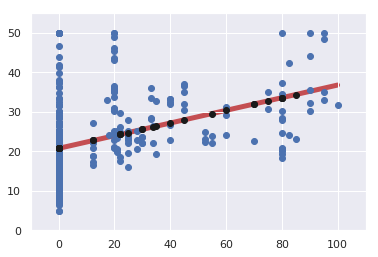

In [22]:
plot_reg(X_train[feature], X_test[feature], y_train, y_test, predictions, reg_line)

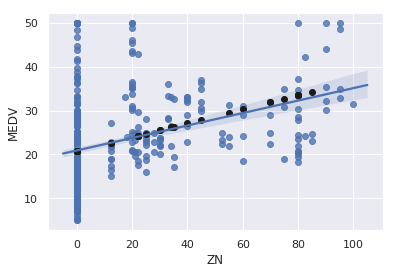

In [23]:
sns.regplot(X[feature], y)
plt.scatter(X_test[feature], predictions, color='k')

## Fehler berechnen

In [24]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

9.2

## Lineare Regression mit mehr als einem Feature

In [25]:
features = ['ZN', 'PTRATIO']

In [26]:
X_train_multiple_features = X_train[features].copy()
X_test_multiple_features = X_test[features].copy()

In [27]:
model = LinearRegression()
model.fit(X_train_multiple_features, y_train)
predictions = model.predict(X_test_multiple_features)

In [28]:
predictions[:5]

array([24.72271274, 18.11241228, 25.72427341, 18.11241228, 21.1170943 ])

In [29]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

9.11

## Lineare Regression mit allen Features

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
combined = pd.concat([X, y], axis=1)
combined.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [32]:
combined.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [33]:
predictions[:5]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254])

In [34]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

5.78

---

## Aufgaben

### Wie groß ist der Fehler, wenn nur das Feature **RM** berücksichtigt wird?

In [35]:
feature = 'RM'

In [36]:
X_train_one_feature = np.array(X_train[feature].copy()).reshape(-1,1)
X_test_one_feature = np.array(X_test[feature].copy()).reshape(-1,1)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train_one_feature, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
predictions = model.predict(X_test_one_feature)

In [40]:
predictions[:5]

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741])

In [41]:
reg_line = compute_line(X_train[feature], model)

In [42]:
model.coef_

array([9.37638431])

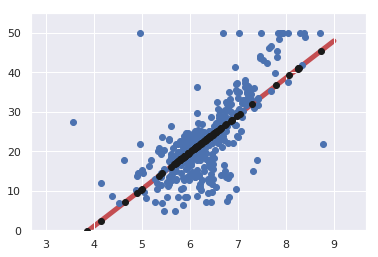

In [43]:
plot_reg(X_train[feature], X_test[feature], y_train, y_test, predictions, reg_line)

In [44]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

6.85

### Wie groß ist der Fehler, wenn nur die Features **RM** und **LSTAT** berücksichtigt werden?

In [50]:
features = ['RM', 'LSTAT']

In [51]:
X_train_multiple_features = X_train[features].copy()
X_test_multiple_features = X_test[features].copy()

In [52]:
model = LinearRegression()
model.fit(X_train_multiple_features, y_train)
predictions = model.predict(X_test_multiple_features)

In [53]:
predictions[:5]

array([26.28587773, 24.25377886, 24.42060228, 13.11754087, 22.49511785])

In [54]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse).round(2)
rmse

6.11